<a href="https://colab.research.google.com/github/salu218/Airbnb_NY_2019_EDA/blob/main/Airbnb_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Airbnb Data Analysis**

# **Project Summary -**

# **Problem Statement**



 **Define Your Business Objective?**

# **Importing required Python libraries**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%time
!apt update --quiet
!apt upgrade --quiet
# GDAL Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal --quiet
# Install rtree - Geopandas requirement
!apt install python3-rtree --quiet
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git --quiet
# Install descartes - Geopandas requirement
!pip install descartes --quiet
# Install plotly
!pip install plotly==4.5.0 --quiet
# To visualize the missing values in the dataset
!pip install missingno


Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [2,308 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,373 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-

In [2]:
# Install plotly
!pip install plotly==4.5.0 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 31.8 MB/s eta 0:00:00


In [2]:
import os
import glob
import numpy as np
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
sns.set_style('whitegrid')
import geopandas as gpd
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import requests
from io import StringIO
%matplotlib inline
import missingno as msno

#importing the required libraries for analysing the data

In [3]:
# directory path of the csv file required for EDA
directory_path = '/content/drive/MyDrive/EDA by Neha/Airbnb/data/'
# pandas dataframe
airbnb_df = pd.read_csv(directory_path+'Airbnb_NYC_2019.csv')

In [4]:
airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [5]:
# number of rows in the dataframe
print("number of rows : ", airbnb_df.shape[0])


number of rows :  48895


In [6]:
# number of columns in the dataframe
print("number of columns : ", airbnb_df.shape[1])


number of columns :  16


In [7]:
# Dataset info
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:

#check for duplication
airbnb_df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [9]:
#missing values count
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:



# helps to calculate the percentage of missing values in each column
(airbnb_df.isnull().sum()/(len(airbnb_df)))*100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

<Axes: >

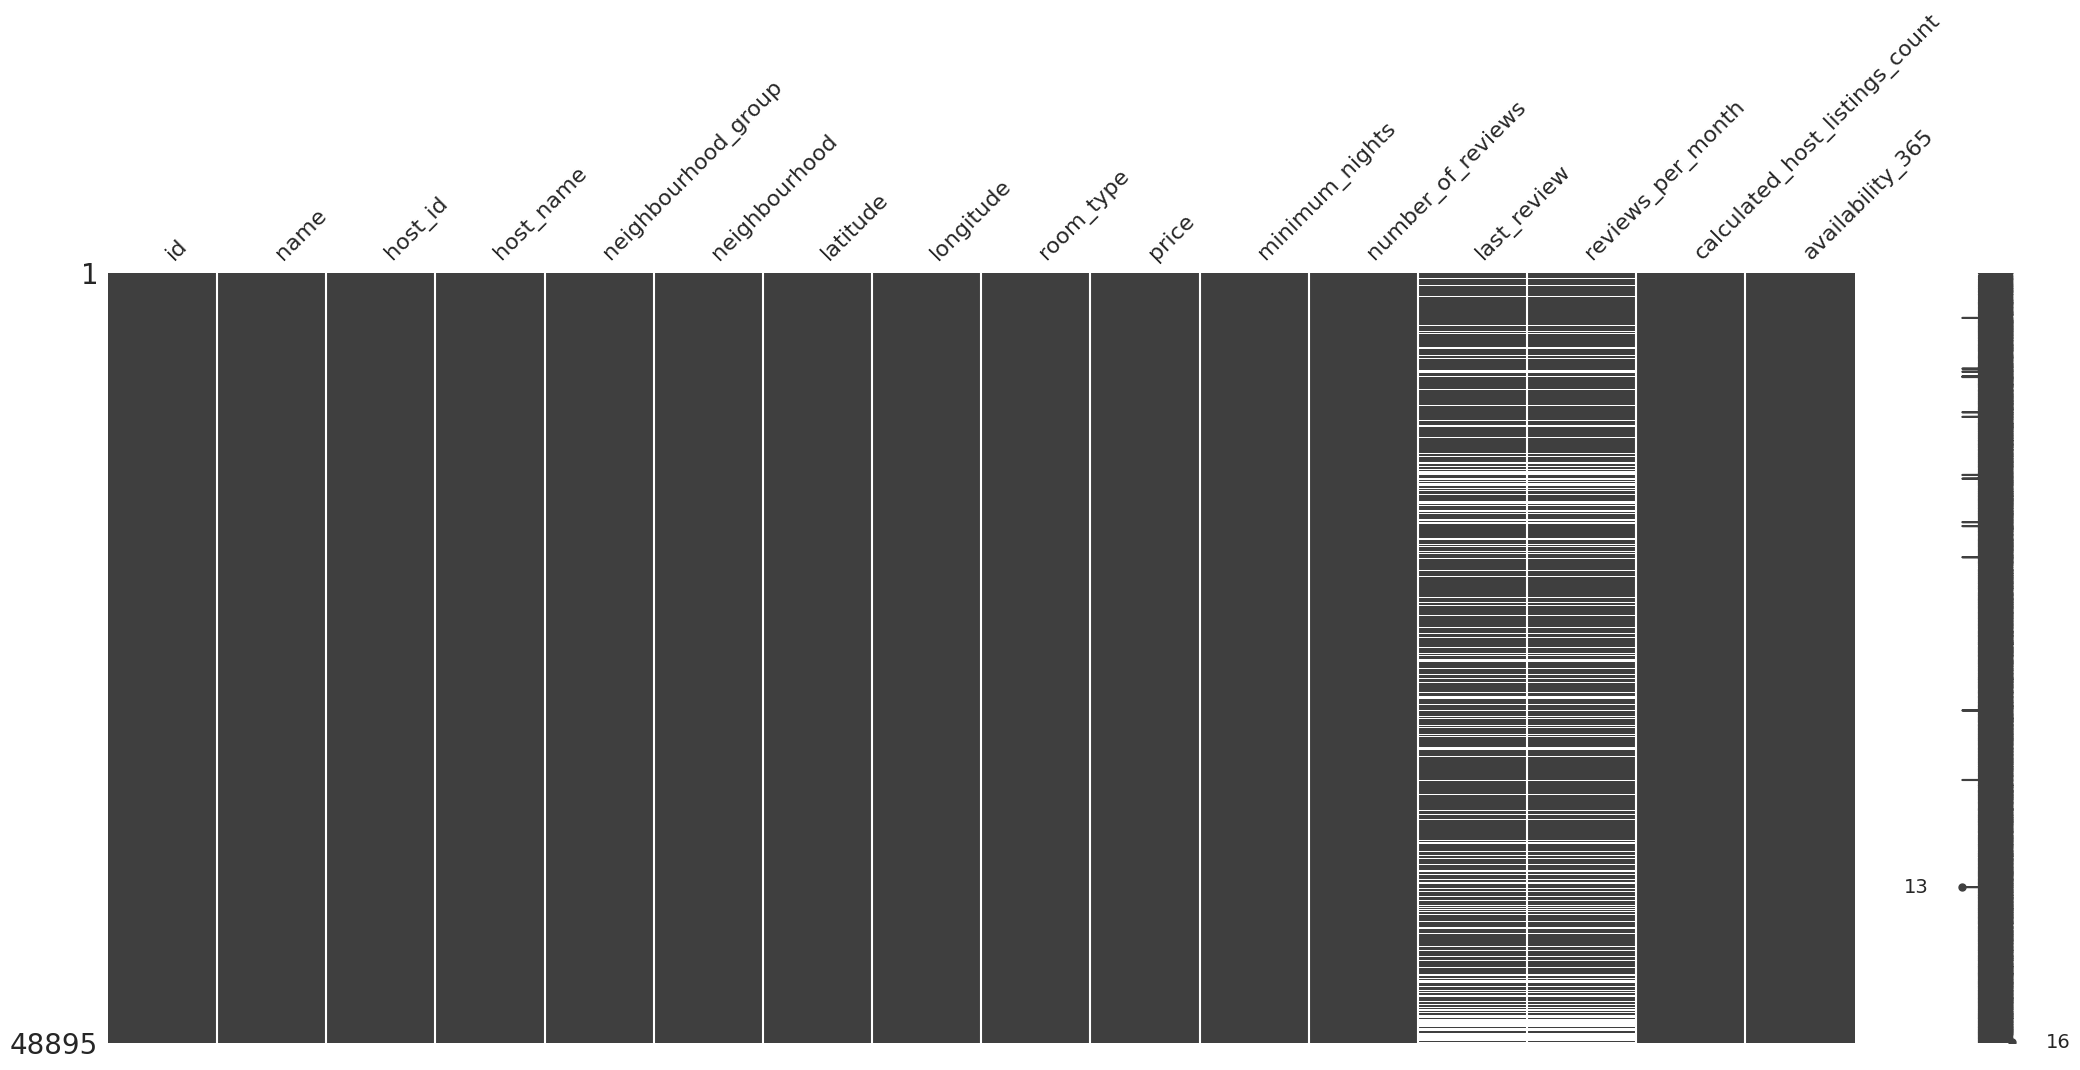

In [11]:
#visualizing the missing values
msno.matrix(airbnb_df)


# What did you know about the dataset?

Answer here

# 2.*Understanding* *your* *Variables*

In [12]:
#Dataset columns
columns_airbnb = airbnb_df.columns
columns_airbnb

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [13]:
airbnb_df.size

782320

In [14]:

#selecting columns with only numerical values
airbnb_df.select_dtypes(include=np.number)


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2595,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,3647,4632,40.80902,-73.94190,150,3,0,NaN,1,365
3,3831,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,5022,7192,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,40.67853,-73.94995,70,2,0,NaN,2,9
48891,36485057,6570630,40.70184,-73.93317,40,4,0,NaN,2,36
48892,36485431,23492952,40.81475,-73.94867,115,10,0,NaN,1,27
48893,36485609,30985759,40.75751,-73.99112,55,1,0,NaN,6,2


In [15]:
airbnb_df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [16]:
airbnb_df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [17]:
airbnb_df['minimum_nights'].unique()

array([   1,    3,   10,   45,    2,    5,    4,   90,    7,   14,   60,
         29,   30,  180,    9,   31,    6,   15,    8,   26,   28,  200,
         50,   17,   21,   11,   25,   13,   35,   27,   18,   20,   40,
         44,   65,   55,  120,  365,  122,   19,  240,   88,  115,  150,
        370,   16,   80,  181,  265,  300,   59,  185,  360,   56,   12,
         70,   39,   24,   32, 1000,  110,  270,   22,   75,  250,   62,
         23, 1250,  364,   74,  198,  100,  500,   43,   91,  480,   53,
         99,  160,   47,  999,  186,  366,   68,   93,   87,  183,  299,
        175,   98,  133,  354,   42,   33,   37,  225,  400,  105,  184,
        153,  134,  222,   58,  210,  275,  182,  114,   85,   36])

In [18]:
# Dataset description of all the columns
airbnb_df.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


In [19]:
#Dataset description of the columns with numeric columns

airbnb_df.describe(include=[np.number])

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [20]:
# Data description including only string columns in a dataframe description

airbnb_df.describe(include= [object])

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


# Variable description

In [22]:

# check unique values for each variable

for i in airbnb_df.columns.tolist():
  print("No. of unique values in ",i,"is",airbnb_df[i].nunique(),".")

No. of unique values in  id is 48895 .
No. of unique values in  name is 47905 .
No. of unique values in  host_id is 37457 .
No. of unique values in  host_name is 11452 .
No. of unique values in  neighbourhood_group is 5 .
No. of unique values in  neighbourhood is 221 .
No. of unique values in  latitude is 19048 .
No. of unique values in  longitude is 14718 .
No. of unique values in  room_type is 3 .
No. of unique values in  price is 674 .
No. of unique values in  minimum_nights is 109 .
No. of unique values in  number_of_reviews is 394 .
No. of unique values in  last_review is 1764 .
No. of unique values in  reviews_per_month is 937 .
No. of unique values in  calculated_host_listings_count is 47 .
No. of unique values in  availability_365 is 366 .


# 3.***Data*** ***Wrangling***

In [23]:
# copy of the dataframe
df_1 = airbnb_df.copy()


In [24]:
df_1 = df_1.drop(['name','id','host_id','host_name','latitude','longitude','last_review','reviews_per_month','number_of_reviews'], axis = 1)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   neighbourhood_group             48895 non-null  object
 1   neighbourhood                   48895 non-null  object
 2   room_type                       48895 non-null  object
 3   price                           48895 non-null  int64 
 4   minimum_nights                  48895 non-null  int64 
 5   calculated_host_listings_count  48895 non-null  int64 
 6   availability_365                48895 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.6+ MB


In [25]:
df_1.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,2,355
2,Manhattan,Harlem,Private room,150,3,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,1,0


In [26]:
df_1.tail()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,2,2,9
48891,Brooklyn,Bushwick,Private room,40,4,2,36
48892,Manhattan,Harlem,Entire home/apt,115,10,1,27
48893,Manhattan,Hell's Kitchen,Shared room,55,1,6,2
48894,Manhattan,Hell's Kitchen,Private room,90,7,1,23


In [27]:
df_1.describe()

,price,minimum_nights,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,7.143982,112.781327
std,240.154170,20.510550,32.952519,131.622289
min,0.000000,1.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.000000
50%,106.000000,3.000000,1.000000,45.000000
75%,175.000000,5.000000,2.000000,227.000000
max,10000.000000,1250.000000,327.000000,365.000000


In [28]:
df_1.describe(include= 'object')

,neighbourhood_group,neighbourhood,room_type
count,48895,48895,48895
unique,5,221,3
top,Manhattan,Williamsburg,Entire home/apt
freq,21661,3920,25409


In [29]:

df_1.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

The above code shows that there is no null value in df_1.

# Visualizations

**Univariate Analysis of Prices**

In [30]:
df_price = df_1['price']

In [31]:
df_price = pd.DataFrame(df_price)
df_price

,price
0,149
1,225
2,150
3,89
4,80
...,...
48890,70
48891,40
48892,115
48893,55


In [32]:
df_price.describe()

,price
count,48895.000000
mean,152.720687
std,240.154170
min,0.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


1.the average prices of the listed rooms are 152

2.with minimun price being 0 and maximum going upto 10000
3.


In [33]:
#Maximum price in the dataframe

df_price.max()

price    10000
dtype: int64

In [37]:
prices = df_price[0:100]

fig = px.histogram(df_price, x="price" ) #, y="Amount charged the most")
fig.show(renderer='colab')


In [38]:
classname2 = px.histogram(df_price, x='price',
                         title='Amount of the Listed Homes', height=550,
                         color_discrete_sequence=['#03DAC5'],
                         )
classname2.update_yaxes(showgrid=True),
classname2.update_xaxes(categoryorder='total descending')
classname2.update_traces(hovertemplate=None)
classname2.update_layout(margin=dict(t=50, b=0, l=80, r=80),
                        hovermode="x unified",
                        xaxis_tickangle=360,
                        xaxis_title='Prices', yaxis_title="Amount Charged the most",
                        plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                        title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                        font=dict(color='#8a8d93'),
                        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
                          )
classname2.show(renderer="colab")

#The codes in this cell plots the histogram in a customisable way

In [39]:
#df = px.data.tips()
# create the bins
counts, bins = np.histogram(df_price, bins=range(0, 100, 5))
bins = 0.5 * (bins[:-1] + bins[1:])

fig = px.bar(x=bins, y=counts, labels={'x':'Prices', 'y':'Frequency of Amount of Charged'})
fig.show(renderer = 'colab')



<Axes: ylabel='Frequency'>

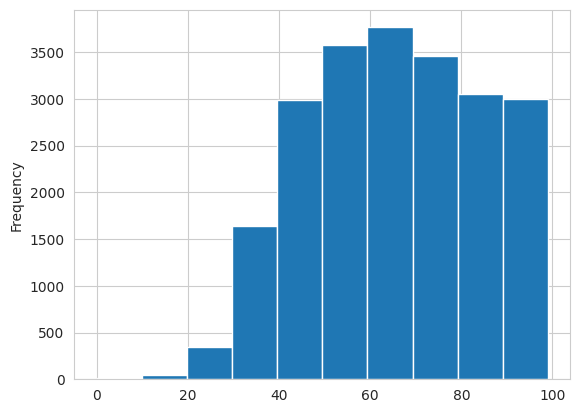

In [40]:
df_price[df_price['price'] < 100]['price'].plot.hist()

In [41]:
#df = px.data.tips()
# create the bins
counts, bins = np.histogram(df_price, bins=range(0, 500, 5))
bins = 0.5 * (bins[:-1] + bins[1:])

fig = px.bar(x=bins, y=counts, labels={'x':'Prices', 'y':'Frequency of Amount of Charged'})
fig.show(renderer = 'colab')



<Axes: ylabel='Frequency'>

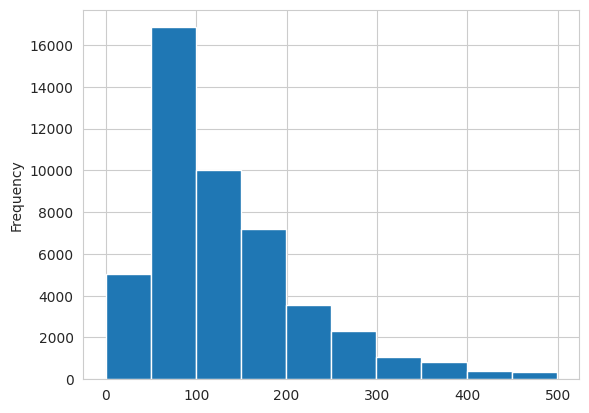

In [42]:
#df_price[].plot.hist()
df_price[df_price['price'] < 500]['price'].plot.hist()

here we can see the minimum price of listing 10 to 20,

between the range of 0 to 99, the maximum number of listing are between the price range 60-70.


In [43]:
#df = px.data.tips()
# create the bins
counts, bins = np.histogram(df_price, bins=range(800, 10000, 5))
bins = 0.5 * (bins[:-1] + bins[1:])

fig = px.bar(x=bins, y=counts, labels={'x':'Prices', 'y':'Frequency of Amount of Charged'})
fig.show(renderer = 'colab')

#this figure is more ambiguous than the one in customisable one above,it's better if plotted that way

<Axes: ylabel='Frequency'>

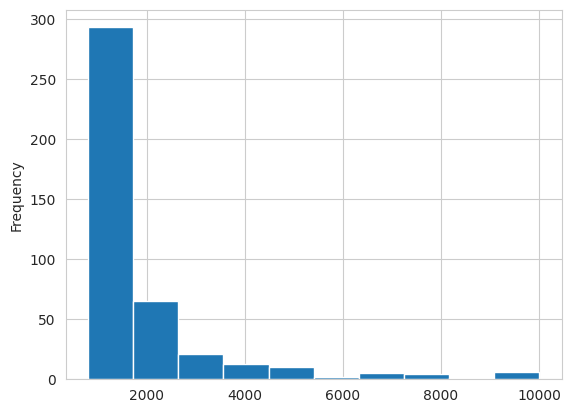

In [44]:
df_price[df_price['price'] > 800]['price'].plot.hist()

(array([347.,  65.,  21.,  13.,  10.,   2.,   5.,   4.,   1.,   6.]),
 array([  800.,  1720.,  2640.,  3560.,  4480.,  5400.,  6320.,  7240.,
         8160.,  9080., 10000.]),
 <BarContainer object of 10 artists>)

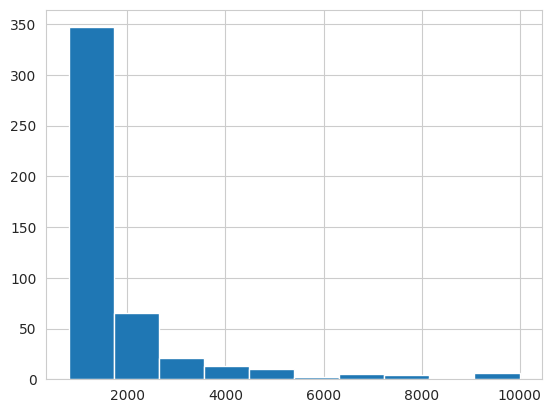

In [45]:
plt.hist(df_price, range = (800,10000 ))

#plotting the same hisogram above by using matplotlib with range parameter

**Univariate analysis of Neighbourhood Groups**

In [46]:
df_neighbourhood_group = df_1['neighbourhood_group']

In [47]:
df_neighbourhood_group = pd.DataFrame(df_neighbourhood_group)
df_neighbourhood_group

,neighbourhood_group
0,Brooklyn
1,Manhattan
2,Manhattan
3,Brooklyn
4,Manhattan
...,...
48890,Brooklyn
48891,Brooklyn
48892,Manhattan
48893,Manhattan


In [48]:
df_neighbourhood_group.describe()

,neighbourhood_group
count,48895
unique,5
top,Manhattan
freq,21661


In [49]:
df_neighbourhood_group.value_counts()

neighbourhood_group
Manhattan              21661
Brooklyn               20104
Queens                  5666
Bronx                   1091
Staten Island            373
Name: count, dtype: int64

In [50]:


fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="count",  x=df_neighbourhood_group['neighbourhood_group']))

fig.update_layout(
    title='Neighbourhood Groups',
    xaxis=dict(title='Boroughs of New York City'),
    yaxis=dict(title='Number of Listed Homes'),
    title_x = 0.5 # to shift the heading to the middle.
)
fig.show(renderer="colab")



the most listed neighbourhood group is manhattan, followed by brooklyn and queens. the least listed neighbourhood_group is staten island

In [51]:
fig = px.histogram(df_neighbourhood_group, x="neighbourhood_group", category_orders=dict(neighbourhood_group=["Brooklyn", "Manhattan", "Queens", "Staten Island","Bronx"]))
fig.show(renderer='colab')

**Univariate Analysis of listed Neighbourhoods**

In [52]:
df_neighbourhood = df_1['neighbourhood']

In [53]:
df_neighbourhood = pd.DataFrame(df_neighbourhood)
df_neighbourhood

,neighbourhood
0,Kensington
1,Midtown
2,Harlem
3,Clinton Hill
4,East Harlem
...,...
48890,Bedford-Stuyvesant
48891,Bushwick
48892,Harlem
48893,Hell's Kitchen


In [54]:
df_neighbourhood.describe()

,neighbourhood
count,48895
unique,221
top,Williamsburg
freq,3920


In [55]:
df_neighbourhood.value_counts()

neighbourhood     
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Willowbrook              1
Fort Wadsworth           1
New Dorp                 1
Woodrow                  1
Name: count, Length: 221, dtype: int64

In [56]:


fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="count",  x=df_neighbourhood['neighbourhood']))

fig.update_layout(
    title='Neighbourhood',
    xaxis=dict(title='Neighbourhoods of New York'),
    yaxis=dict(title='Number of Listed Homes'),
    title_x = 0.5 # to shift the heading to the middle.
)
fig.show(renderer="colab")



**Univariate Analysis of Types of rooms listed**